<a href="https://colab.research.google.com/github/lsharples1/Ethereum_Fraud_Prediction/blob/main/ethFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


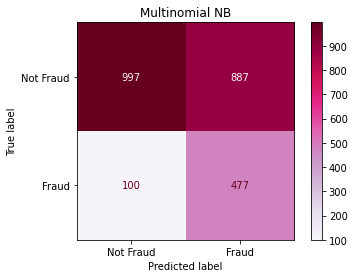

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.5989435188947583
0.5989435188947583


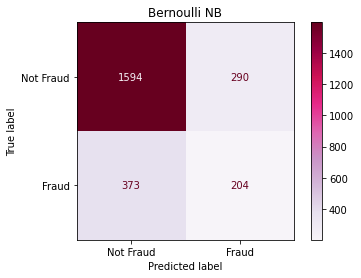

0.7305973181633483
0.7305973181633483


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Mar  9 10:58:52 2021
@author: lillysharples
"""

import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as metrics

from collections import Counter

df = pd.read_csv('https://raw.githubusercontent.com/kimberly-nguyen/CSCI4380_Mini_Project_1/main/transaction_dataset.csv?token=AO4LMYIYLUFO4GW7A4QBMN3BWNVEA')
#print(df.columns.values.tolist())
df.columns = [c.replace(' ', '_') for c in df.columns]

le = preprocessing.LabelEncoder()
sent = le.fit_transform(df._ERC20_most_sent_token_type)
df['MostSentToken'] = sent

rec = le.fit_transform(df._ERC20_most_rec_token_type)
df['MostRecToken'] = rec
data = df[['Sent_tnx', 'Received_Tnx','Avg_min_between_sent_tnx', 'Avg_min_between_received_tnx', 'MostSentToken', 'MostRecToken']]
target = df.FLAG
#print(target.value_counts())


def plot(classifier, x, y, title, y_pred): 
    class_names = ["Not Fraud", "Fraud"]
    disp = plot_confusion_matrix(classifier, x, y,
                                 display_labels=class_names,
                                 cmap=plt.cm.PuRd
                                   )
    disp.ax_.set_title(title)
    plt.show() 
    print(metrics.accuracy_score(y, y_pred))
    
X = data
Y = target
class_names = ['NonFraud','Fraud']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)



clfM = MultinomialNB().fit(X_train, Y_train)
clfB = BernoulliNB().fit(X_train, Y_train)

Y_predM = clfM.predict(X_test)
Y_predB = clfB.predict(X_test)

accuracyM = metrics.accuracy_score(Y_test, Y_predM)
plot(clfM, X_test, Y_test, "Multinomial NB", Y_predM)
print(accuracyM)
accuracyB = metrics.accuracy_score(Y_test, Y_predB)
plot(clfB, X_test, Y_test, "Bernoulli NB", Y_predB)
print(accuracyB)

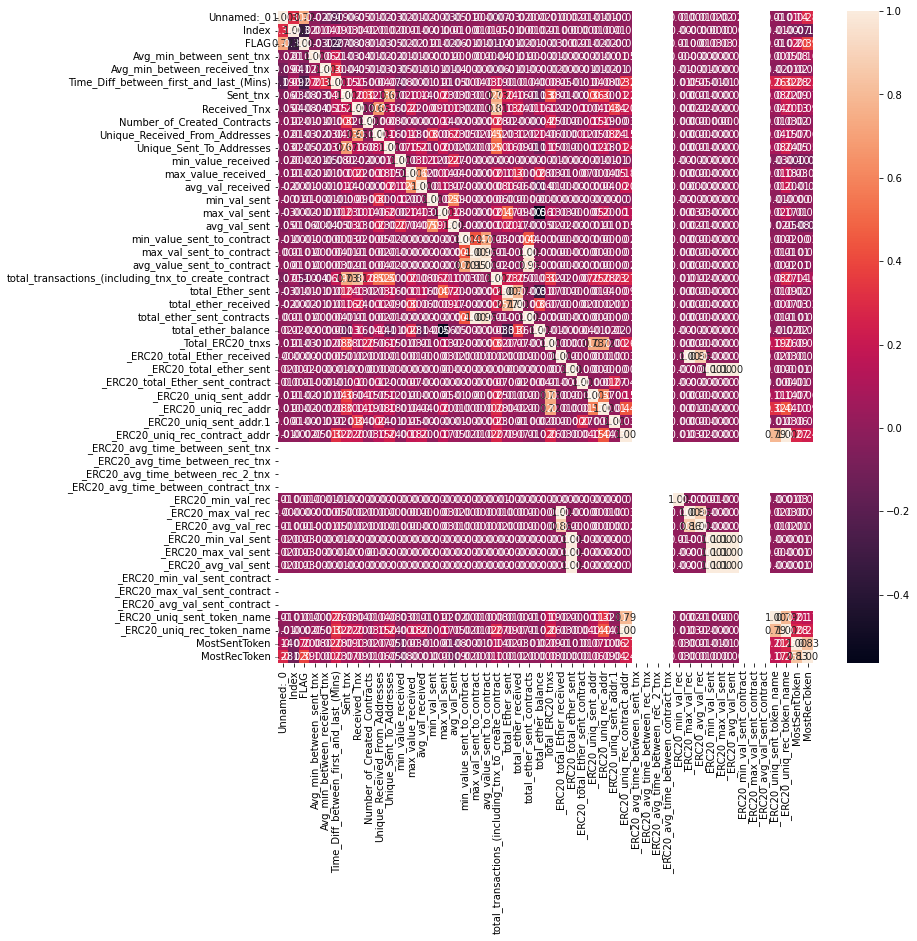